## 写経
---
SoftwareDesign 201712月号

P.27 「数式が怖いならコードで理解」を写経

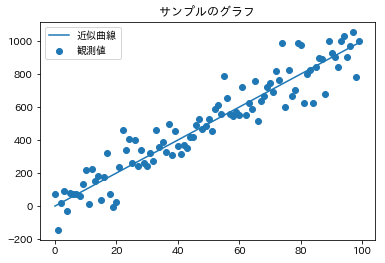

In [1]:

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

np.random.seed(10)

x = np.linspace(0,99,100)
f_noisy = np.vectorize(lambda x:x * 10 + np.random.normal(0,100))
d = f_noisy(x)
plt.scatter(x,d,label = '観測値')
plt.title('サンプルのグラフ')

#近似直線
f = np.vectorize(lambda x,w:x*w)

line_f = f(x,10)
plt.plot(x,line_f,label='近似曲線')
plt.legend(loc = 'upper left')


約10をxに掛けると近似曲線となる。

この係数を求める＝誤差関数の値が最小になるパラメータを求める

Text(0,0.5,'誤差 E(w)')

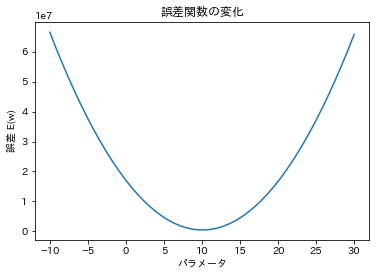

In [2]:
#誤差関数
E = np.vectorize(lambda w: 1/2 * sum([(i-j) ** 2 for i,j in zip(d,f(x,w))]))

#適当にパラメータを設定して誤差関数の様子を目視する
ws = np.linspace(-10,30,50)
plt.plot(ws,E(ws),'-')
plt.title('誤差関数の変化')
plt.xlabel('パラメータ')
plt.ylabel('誤差 E(w)')


In [4]:
#最急下降法
def gradient_decent(epsilon,error = 1e-08,iter_max=1000):
    
    """
    epsilon:学習係数
    error:収束条件（値の変化がこの値より小さくなったら終了）
    iter_max:繰り返し最大回数
    
    """
    #初期値を設定
    w = np.random.randint(-20,20)
    w_history = [w]

    for _ in range(iter_max):
        w_next = w - epsilon * (sum(x * x * w) - sum(d * x))
        if abs(w_next - w) < error:
            break
        w = w_next
        w_history.append(w)
    
    return w,w_history


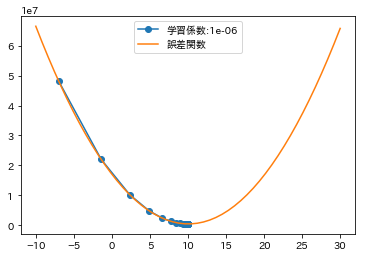

In [5]:
PTN1 = 1e-06
lblname = '学習係数:' + str(PTN1)
w,w_history = gradient_decent(PTN1)
plt.plot(w_history,E(w_history),'o-',label =lblname)
plt.plot(ws,E(ws),label='誤差関数')
plt.legend()
plt.xlabel = 'パラメータw'
plt.ylabel = '誤差 E(w)'

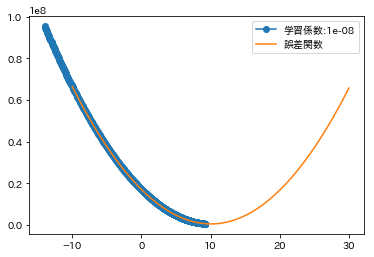

In [53]:
PTN2 = 1e-08
lblname = '学習係数:' + str(PTN2)
w,w_history = gradient_decent(PTN2)
plt.plot(w_history,E(w_history),'o-',label =lblname)
plt.plot(ws,E(ws),label='誤差関数')
plt.legend()
plt.xlabel = 'パラメータw'
plt.ylabel = '誤差 E(w)'

C:\Users\miyachop\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\miyachop\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\miyachop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\miyachop\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
C:\Users\miyachop\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2048: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


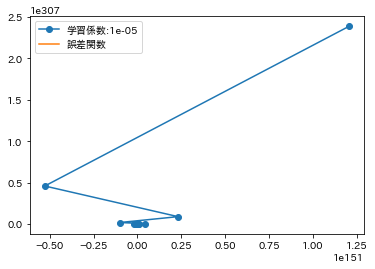

In [6]:
PTN3 = 1e-05
lblname = '学習係数:' + str(PTN3)
w,w_history = gradient_decent(PTN3)
plt.plot(w_history,E(w_history),'o-',label =lblname)
plt.plot(ws,E(ws),label='誤差関数')
plt.legend()
plt.xlabel = 'パラメータw'
plt.ylabel = '誤差 E(w)'

学習係数を小さくすればするほど、ステップが多くなり計算時間が掛かる

学習係数を大きくすると、ステップは少なくなるが、wの値の変化が大きくなりうまく収束できなくなる